In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
print(sns.__version__)

0.11.2


In [5]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.6.0


In [6]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)\
CustomerId — идентификатор клиента\
Surname — фамилия клиента\
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)\
Geography — страна клиента (банк международный)\
Gender — пол клиента\
Age — возраст клиента\
Tenure — сколько лет клиент пользуется услугами банка\
Balance — баланс на счетах клиента в банке\
NumOfProducts — количество услуг банка, которые приобрёл клиент\
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)\
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)\
EstimatedSalary — предполагаемая заработная плата клиента\
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [7]:
churn_data.drop('RowNumber', axis = 1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [8]:
churn_data['loyalty'] = churn_data['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')

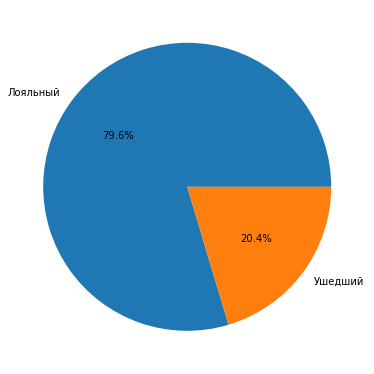

In [9]:
loyal = churn_data['loyalty'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyal,
    labels=loyal.index,
    autopct='%.1f%%'
);

Вывод 9.1

Исходя из графика мы видим, что каждый 5 клиент уходит. Для оценки критичности ситуации, необходимо провести сравнительный анализ по отрасли. Однако в любом случае рассделование причин ухода клиентов может улучшить текущее соотношение

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

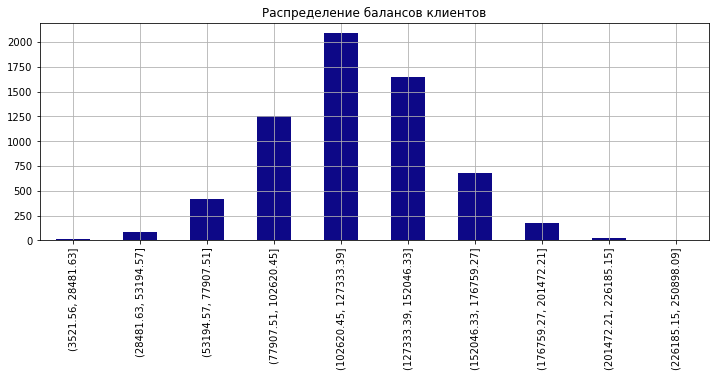

In [23]:
mask = (churn_data['Balance'] > 2500)
b2500 = churn_data[mask]['Balance'].value_counts(bins = 10, sort = False)
b2500.plot(
    kind='bar',
    grid=True,
     title='Распределение балансов клиентов',
    figsize=(12, 4),
    colormap='plasma'
);

Вывод 9.2

На графике видно нормальное распределение. Чаще всего среди клиентов встречается баланс от 102 000 до 127 000 долларов 

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

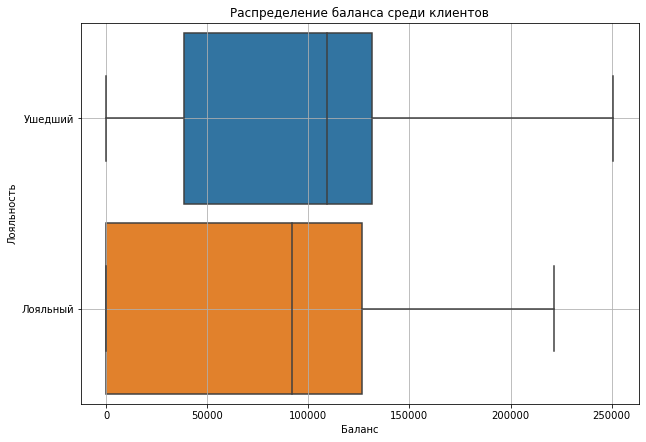

In [29]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='loyalty',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса среди клиентов');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

Вывод 9.3

На графиках видно, что клиенты которые ушли имели большее количество денежных средств на счете. Возможными причинами ухода могут быть:
1) Недостаточный уровень обслуживания, т.к. у клиентов с большими деньгами большие запросы
2) Худшие условия для клиентов с крупными суммами относительно конкурентов (например % ставки, стоимость переводов и т.д.)
3) Отсутствие льгот и спец программ для крупных клиентов 

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

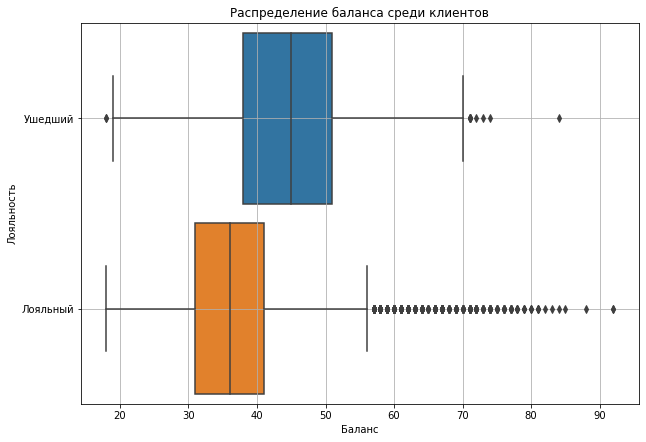

In [30]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='loyalty',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса среди клиентов');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

Вывод 9.4

Из графика видно, что в основном в банке остаются клиенты в категории от 30 до 40, а уходят от 40 до 50. Имеет смысл обратить внимение именно на категорию от 40 до 50, чтобы уменьшить отток клиентов. Так же стоит обратить внимание на чистоту данных, т.к. маловероятно, что в банке есть клиент возрастом 95 лет.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

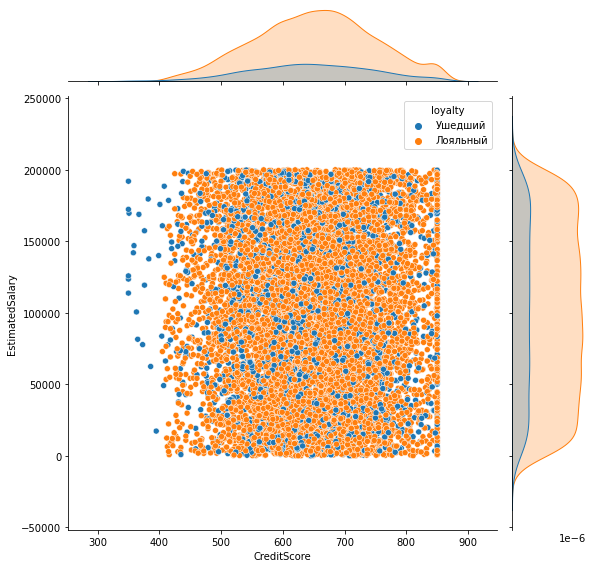

In [35]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='loyalty',
    height=8,
)

Вывод 9.5

Зависимости между кредитным рейтингом клиента и его предполагаемой зарплатой найти не удалось

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Text(0.5, 1.0, 'Отток клиентов в зависимости от пола')

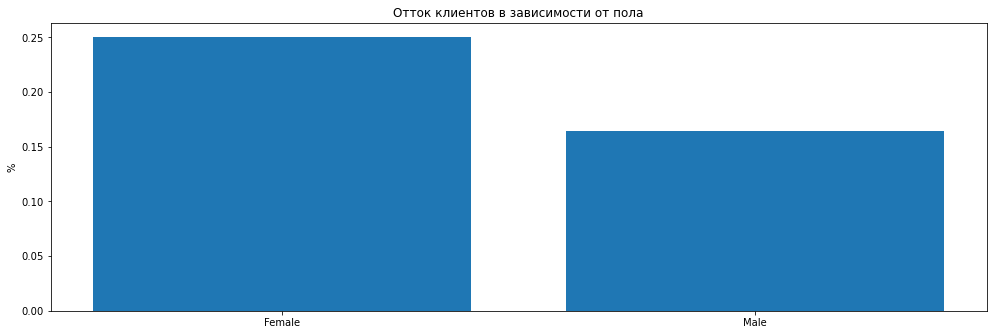

In [40]:
gen_leave = churn_data.groupby('Gender')['Exited'].mean()
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = gen_leave.index, height = gen_leave);
main_axes.set_ylabel('%')
main_axes.set_title('Отток клиентов в зависимости от пола')


Вывод 9.6

Мы видим, что женщины чаще уходят (Примерно каждая 4), чем мужчины (примерно каждый 6)

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

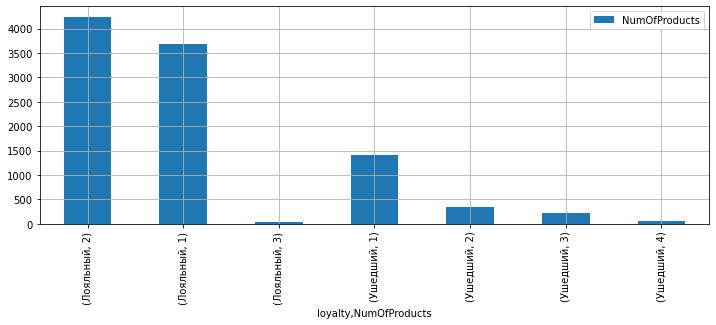

In [53]:
NOP = churn_data.groupby('loyalty')['NumOfProducts'].value_counts()
NOP.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
    legend = True
    
);

Вывод 9.7

Мы видим, что лояльные клиенты покупают продукты чаще. Однако клиенты, которые уходили, пробовали большее количествао продуктов (Лидеры в категориях 3 и 4 продукта)

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [81]:
churn_data['activity'] = churn_data['IsActiveMember'].apply(lambda x: 'Не активный' if x == 0 else 'Активный')
bar_data = churn_data.groupby('activity', as_index=False).sum()
fig = px.bar(
    data_frame=bar_data, 
    y ='Exited', #ось абсцисс
    x = bar_data['activity'],
    height=500, 
    width=1000, 
    title='Количество ушедших клиентов' #заголовок
)
fig.show()

Вывод 9.8

Мы видим, что среди активных пользователей, клиентов ушло почти в 2 раза меньше. Из этого можно сделать вывод, что вовлечение клиентов может значительно уменьшить их отток. Так же возможна обратная ситуация, что активные клиенты менее склоны к уходу, а значит им не нужно предлагать специальные акции нацеленные на удержание

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [103]:
churn_data['loyal'] = churn_data['Exited'].apply(lambda x: 1 if x == 0 else 0)
map_df = churn_data.groupby("Geography").sum()
map_df['exit index'] = map_df['Exited']/(map_df['Exited']+ map_df['loyal'])

fig = px.choropleth(
    data_frame=map_df, #DataFrame
    locations=map_df.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="exit index", #от чего зависит цвет
    range_color=[0, 0.5], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

Вывод 9.9

Мы видим, что доля ушедших клиентов в Германии почти в 2 раза больше, чем в Испании и Франции

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [104]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [105]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

In [106]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,loyalty,activity,loyal,CreditScoreCat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Ушедший,Активный,0,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Лояльный,Активный,1,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Ушедший,Не активный,0,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Лояльный,Не активный,1,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Лояльный,Активный,1,Excellent


Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(0.5, 1.0, 'Тепловая карта оттока клиентов')

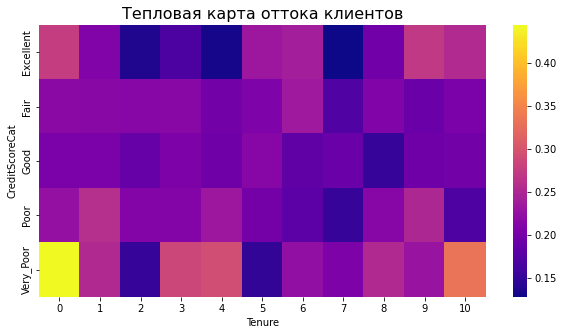

In [113]:
pivot = churn_data.pivot_table(
    values = 'Exited',
    index = 'CreditScoreCat',
    columns= 'Tenure',
    aggfunc='mean'
)

fig = plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=16)

Вывод 9.10

Мы видим, что чаще всего уходят люди с плохим кредитным счетом, в самом начале взаимодействия с банком. У людей с идеальным кредитным счетом со временем растет вероятность ухода из банка. На 9 и 0 годы они схожи. Наименьшая вероятность ухода клинтов, в период со 2 по 7 года.